# Statistics for Data Science Final Project: Life Expectancy
___

### Group 2: 
##### Irina Belaya
##### Anna Mozharova
##### Tareq Ui-Huda
##### Saeed Khalili
_____

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt 
import os 
import statsmodels.formula.api as sm
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import metrics
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [3]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Data Preparation and Cleaning

In [4]:
# Observing each of 22 columns' data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Observing basic statistics of the dataframe

data.describe()                                                                                                         

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.shape

# Dataframe has 2938 rows and 22 columns

(2938, 22)

In [7]:
# Name of the 22 columns
print(list(data.columns))

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [8]:
# Renaming columns with underscore(_) to get rid of empty spaces.
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [9]:
# Now dataframe has no blank space in column's name.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [10]:
# The dataset has 2 columns with non-numerical values, i.e. categorical variables: Country, Status

In [11]:
# 193 different country names are found in Country coloumns
len(data['Country'].unique())

193

In [12]:
# Observing number of Developed and Developing countries by grouping the dataframe categorical feature "Status". 
data.groupby('Status')["Status"].count()

Status
Developed      512
Developing    2426
Name: Status, dtype: int64

In [13]:
# # Categorical Variable 1 :: Country
distinct_countries = data['Country'].unique()
distinct_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

We have observed that for some country names there are spaces inside, we will remove this spaces within the values

In [15]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

In [16]:
data.Country = data.Country.apply(remove_whitespace)

In [17]:
distinct_countries = data['Country'].unique()
distinct_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia(PlurinationalStateof)', 'BosniaandHerzegovina',
       'Botswana', 'Brazil', 'BruneiDarussalam', 'Bulgaria',
       'BurkinaFaso', 'Burundi', "Côted'Ivoire", 'CaboVerde', 'Cambodia',
       'Cameroon', 'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'CookIslands',
       'CostaRica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "DemocraticPeople'sRepublicofKorea",
       'DemocraticRepublicoftheCongo', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador',
       'EquatorialGuinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Gren

In [18]:
# Categorical Variable 2 :: Status
distinct_status = data['Status'].unique()
distinct_status

array(['Developing', 'Developed'], dtype=object)

In [19]:
#Changing column names
#------------------------
orig_cols = list(data.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').replace('-', '_').lower())
    
data.columns = new_cols
data.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
data.rename(columns={'hiv/aids':'hiv_aids'}, inplace=True)

data.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,...,polio,tot_exp,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


We have to make sure that it doesn't contradict reality. Thus, assuring some real-life constraints like
Adult Mortality is never below 35 and over 600 in reality

Infant deaths and under 5 deaths cannot be below 2/1000 or more than 1000

In [20]:
data.adult_mortality = data.apply(lambda x: np.nan if (x.adult_mortality < 35 or x.adult_mortality > 600) else x.adult_mortality, axis=1)
data.infant_deaths = data.apply(lambda x: np.nan if (x.infant_deaths < 2 or x.infant_deaths > 900) else x.infant_deaths, axis=1)
data.under_five_deaths = data.apply(lambda x: np.nan if (x.under_five_deaths < 3 or x.under_five_deaths > 800) else x.under_five_deaths, axis=1)

In [21]:
# Checking null value
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,country,0
1,year,0
2,status,0
3,life_expectancy,10
4,adult_mortality,468
5,infant_deaths,1206
6,alcohol,194
7,percentage_exp,0
8,hepatitisb,553
9,measles,0


We can see that there are no null values in categorical columns, so for the numerical ones we would fill them with the mean values.

In [23]:
data.fillna(data.mean(), inplace=True)

In [24]:
# No Null values any more. 

a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,country,0
1,year,0
2,status,0
3,life_expectancy,0
4,adult_mortality,0
5,infant_deaths,0
6,alcohol,0
7,percentage_exp,0
8,hepatitisb,0
9,measles,0


In [26]:
data.head(3)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,...,polio,tot_exp,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [27]:
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,bmi,under_five_deaths,polio,tot_exp,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,186.581377,38.581986,4.602861,738.251295,80.940461,2419.592240,38.321247,51.997502,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,99.311664,57.467308,3.916288,1987.914858,22.586855,11467.272489,19.927677,63.222669,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,35.000000,2.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,122.000000,10.000000,1.092500,4.685343,80.940461,0.000000,19.400000,18.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,184.000000,38.581986,4.160000,64.912906,87.000000,17.000000,43.000000,51.997502,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,225.000000,38.581986,7.390000,441.534144,96.000000,360.250000,56.100000,51.997502,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,599.000000,576.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,788.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Data Exploration

### Checking for linear correlation between Life Expectancy and the rest of the variables

In [28]:
# Features not required will be stored in this list

feature_not_required = []

In [29]:
data_copy = data

/Users/irinabelaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


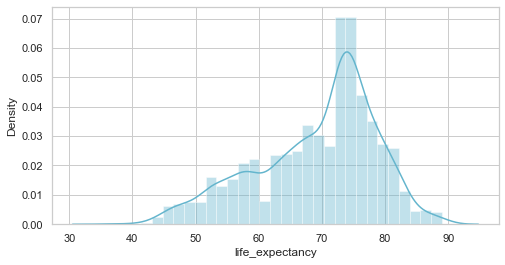

In [30]:
# Before proceeding with feature elimination lets have a look at the distribution of our 'Y'
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.distplot(data['life_expectancy'], kde = True, color = 'c')

Life Expectancy is normally distributed and therefore fits for prediction using linear regression (Tareq differes and affirmed this is a moderately left skewed distribution, not exactly normal distribution
)



<AxesSubplot:xlabel='alcohol', ylabel='life_expectancy'>

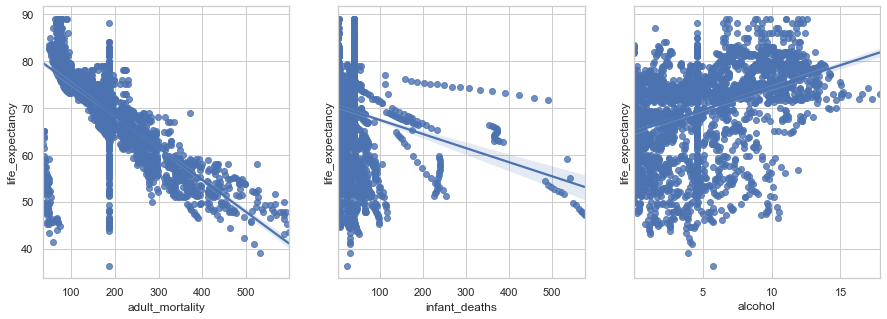

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=data['adult_mortality'], y=data['life_expectancy'], ax=ax1)
sns.regplot(x=data['infant_deaths'], y=data['life_expectancy'], ax=ax2)
sns.regplot(x=data['alcohol'], y=data['life_expectancy'], ax=ax3)

### Observation 1:

Adult Mortality is showing a negative linear relationship

Infant death is showing no significant linear relationship, thus not required

Infant death is showing no significant linear relationship, thus not required

In [32]:
feature_not_required.append('infant_deaths')
feature_not_required.append('alcohol')

<AxesSubplot:xlabel='measles', ylabel='life_expectancy'>

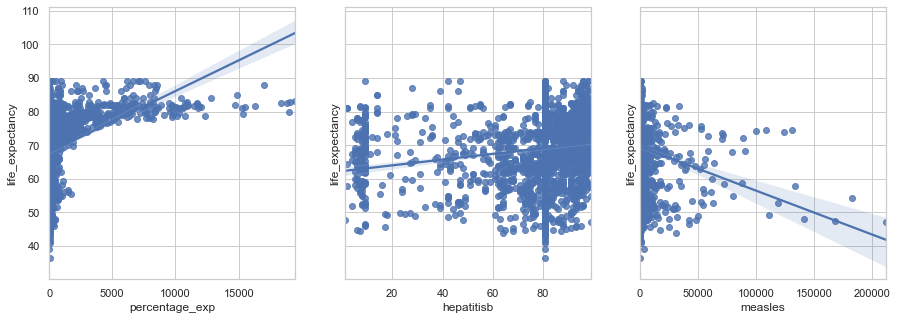

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=data['percentage_exp'], y=data['life_expectancy'], ax=ax1)
sns.regplot(x=data['hepatitisb'], y=data['life_expectancy'], ax=ax2)
sns.regplot(x=data['measles'], y=data['life_expectancy'], ax=ax3)

### Observation 2:

Pcnt_expenditure is showing significant linear relationship, thus required

Hepatitis_b is showing no significant linear relationship, thus not required

Measles is showing no significant linear relationship, thus not required

In [34]:
feature_not_required.append('measles')
feature_not_required.append('hepatitisb')

<AxesSubplot:xlabel='diphtheria', ylabel='life_expectancy'>

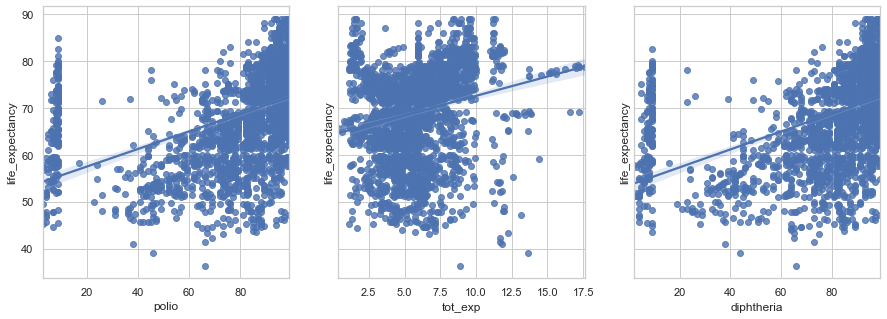

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=data['polio'], y=data['life_expectancy'], ax=ax1)
sns.regplot(x=data['tot_exp'], y=data['life_expectancy'], ax=ax2)
sns.regplot(x=data['diphtheria'], y=data['life_expectancy'], ax=ax3)

### Observation 3:

Polio is showing small negative significant linear relationship, thus required

Total_expenditure is showing no significant linear relationship, thus not required

Diphtheria is showing small negative significant linear relationship, thus required

In [36]:

feature_not_required.append('tot_exp')


<AxesSubplot:xlabel='population', ylabel='life_expectancy'>

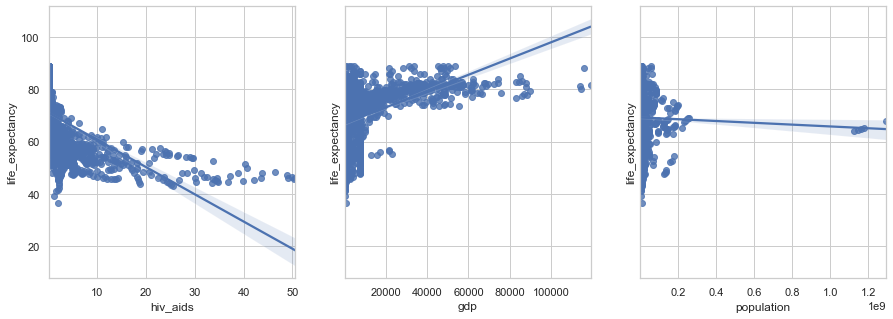

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=data['hiv_aids'], y=data['life_expectancy'], ax=ax1)
sns.regplot(x=data['gdp'], y=data['life_expectancy'], ax=ax2)
sns.regplot(x=data['population'], y=data['life_expectancy'], ax=ax3)

### Observation 4:
    
HIV/aids is showing significant linear relationship, thus required

GDP is showing small significant linear relationship, thus required

Population is showing no significant linear relationship, thus not required

In [38]:

feature_not_required.append('population')

<AxesSubplot:xlabel='income_comp_of_resources', ylabel='life_expectancy'>

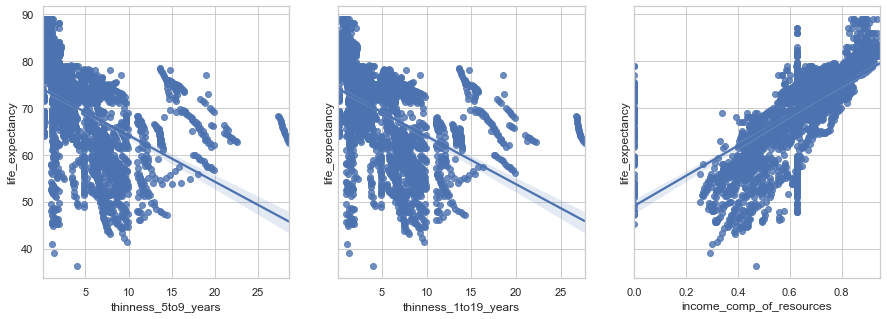

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=data['thinness_1to19_years'], y=data['life_expectancy'], ax=ax2)
sns.regplot(x=data['thinness_5to9_years'], y=data['life_expectancy'], ax=ax1)
sns.regplot(x=data['income_comp_of_resources'], y=data['life_expectancy'], ax=ax3)

### Observation 5:

Income_composition is showing significant linear relationship, thus required

thinness_1-19 is showing no significant linear relationship, thus not required

thinness_5-9 is showing no significant linear relationship, thus not required

In [40]:
feature_not_required.append('thinness_1to19_years')
feature_not_required.append('thinness_5to9_years')

<AxesSubplot:xlabel='bmi', ylabel='life_expectancy'>

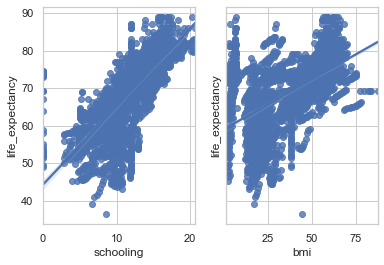

In [41]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x=data['schooling'], y=data['life_expectancy'], ax=ax1)
sns.regplot(x=data['bmi'], y=data['life_expectancy'], ax=ax2)

### Observation 6:

Schooling is showing significant linear relationship, thus required

BMI-19 is showing linear relationship, thus required

### More data exploration 

In [42]:
# Dropping features not required after analysis from previous steps above. Saved dataframe data_a after deletion of not required features.
data_a = data.drop(feature_not_required,axis=1)

In [43]:
data_a

,country,year,status,life_expectancy,adult_mortality,percentage_exp,bmi,under_five_deaths,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.000000,71.279624,19.1,83.0,6.0,65.0,0.1,584.259210,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.000000,73.523582,18.6,86.0,58.0,62.0,0.1,612.696514,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.000000,73.219243,18.1,89.0,62.0,64.0,0.1,631.744976,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.000000,78.184215,17.6,93.0,67.0,67.0,0.1,669.959000,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.000000,7.097109,17.2,97.0,68.0,68.0,0.1,63.537231,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,186.581377,0.000000,27.1,42.0,67.0,65.0,33.6,454.366654,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,186.581377,0.000000,26.7,41.0,7.0,68.0,36.7,453.351155,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.000000,0.000000,26.3,40.0,73.0,71.0,39.8,57.348340,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,186.581377,0.000000,25.9,39.0,76.0,75.0,42.1,548.587312,0.427,9.8


In [44]:
data_a.corrwith(data_a['life_expectancy'])

year                        0.169623
life_expectancy             1.000000
adult_mortality            -0.713301
percentage_exp              0.381791
bmi                         0.559255
under_five_deaths          -0.169708
polio                       0.461574
diphtheria                  0.475418
hiv_aids                   -0.556457
gdp                         0.430493
income_comp_of_resources    0.692483
schooling                   0.715066
dtype: float64

In [45]:
# Dropping under_five_deaths, percentage_exp, and year columns because they show no significance

data_a = data_a.drop(['under_five_deaths','percentage_exp','year'], axis=1)

In [46]:
data_a

,country,status,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling
0,Afghanistan,Developing,65.0,263.000000,19.1,6.0,65.0,0.1,584.259210,0.479,10.1
1,Afghanistan,Developing,59.9,271.000000,18.6,58.0,62.0,0.1,612.696514,0.476,10.0
2,Afghanistan,Developing,59.9,268.000000,18.1,62.0,64.0,0.1,631.744976,0.470,9.9
3,Afghanistan,Developing,59.5,272.000000,17.6,67.0,67.0,0.1,669.959000,0.463,9.8
4,Afghanistan,Developing,59.2,275.000000,17.2,68.0,68.0,0.1,63.537231,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,44.3,186.581377,27.1,67.0,65.0,33.6,454.366654,0.407,9.2
2934,Zimbabwe,Developing,44.5,186.581377,26.7,7.0,68.0,36.7,453.351155,0.418,9.5
2935,Zimbabwe,Developing,44.8,73.000000,26.3,73.0,71.0,39.8,57.348340,0.427,10.0
2936,Zimbabwe,Developing,45.3,186.581377,25.9,76.0,75.0,42.1,548.587312,0.427,9.8


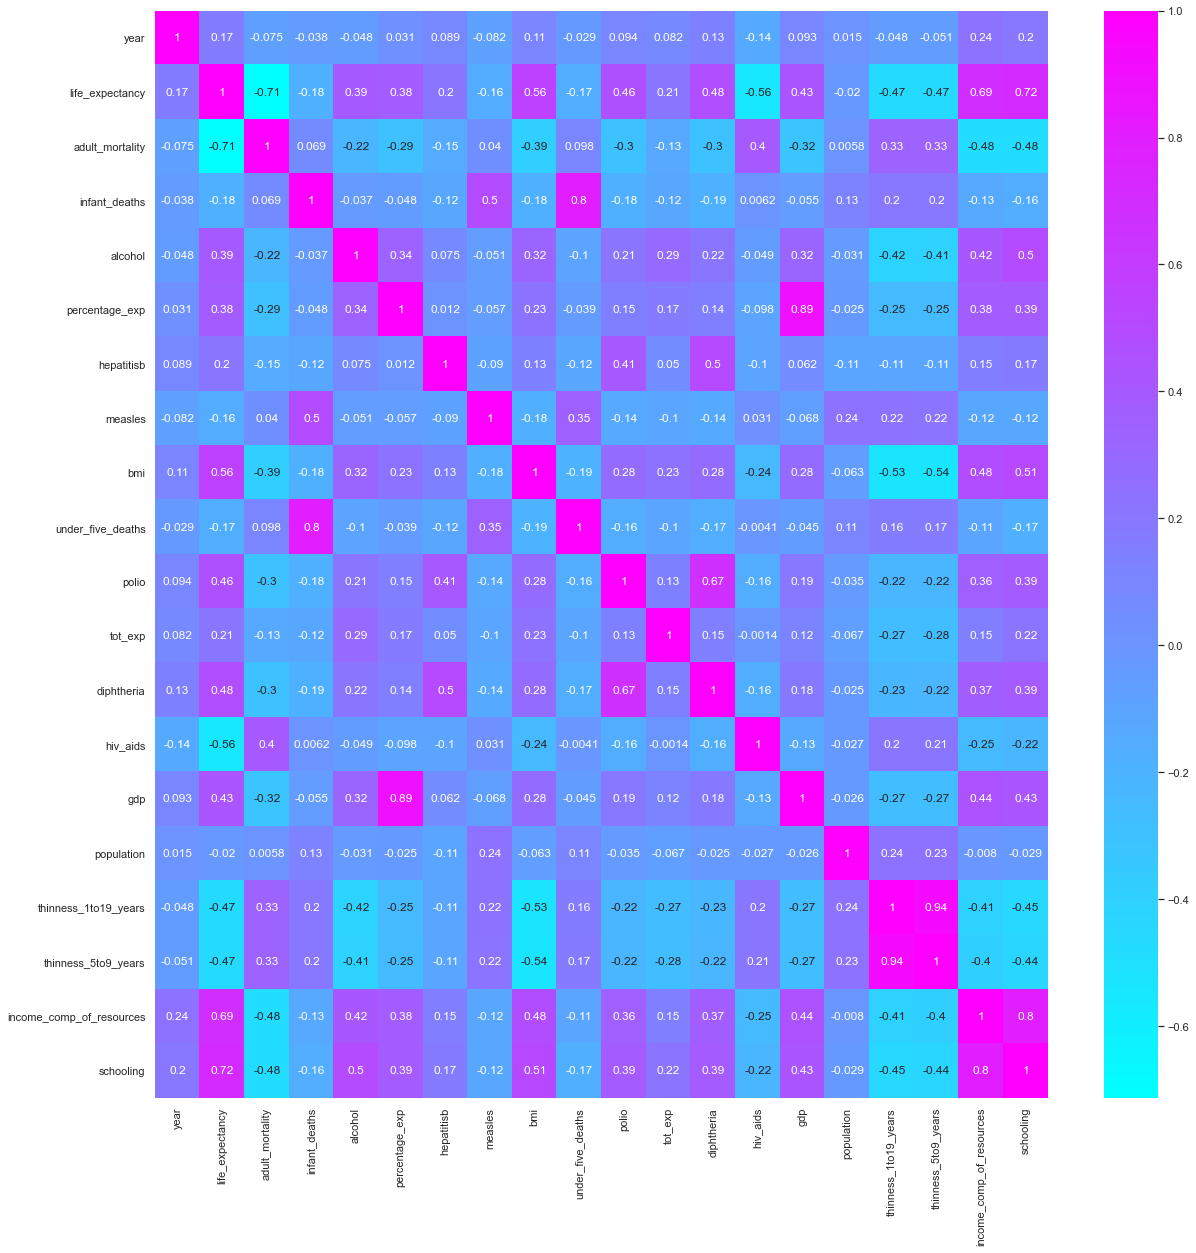

In [47]:
# Corelation of variables in data dataset 
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(data.corr(), annot=True, cmap='cool')

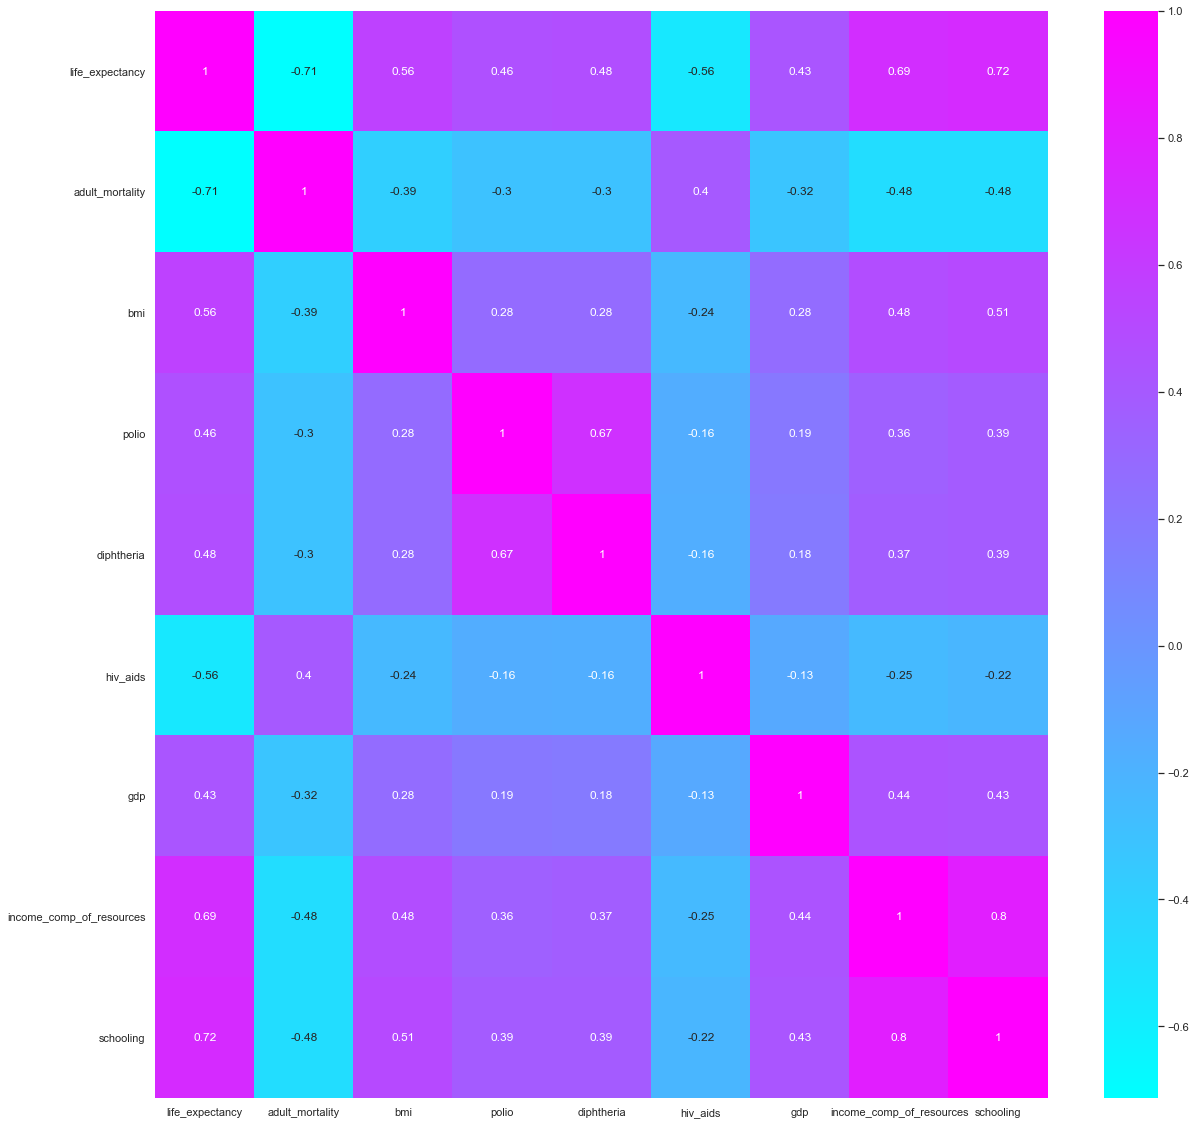

In [48]:
# Correlation of variables in data_a dataset

f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(data_a.corr(), annot=True, cmap='cool')

<AxesSubplot:>

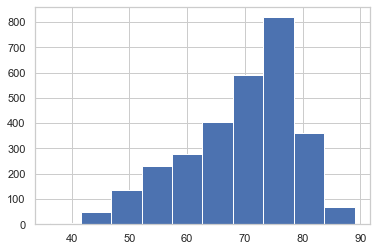

In [51]:
data['life_expectancy'].hist()

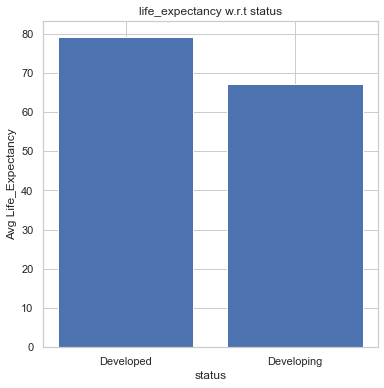

In [52]:
plt.figure(figsize=(6,6))
plt.bar(data.groupby('status')['status'].count().index, data.groupby('status')['life_expectancy'].mean())
plt.xlabel("status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("life_expectancy w.r.t status")
plt.show()

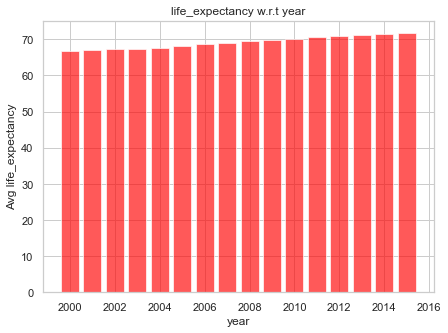

In [53]:
plt.figure(figsize=(7,5))
plt.bar(data.groupby('year')['year'].count().index, data.groupby('year')['life_expectancy'].mean(),color='red',alpha=0.65)
plt.xlabel("year",fontsize=12)
plt.ylabel("Avg life_expectancy",fontsize=12)
plt.title("life_expectancy w.r.t year")
plt.show()

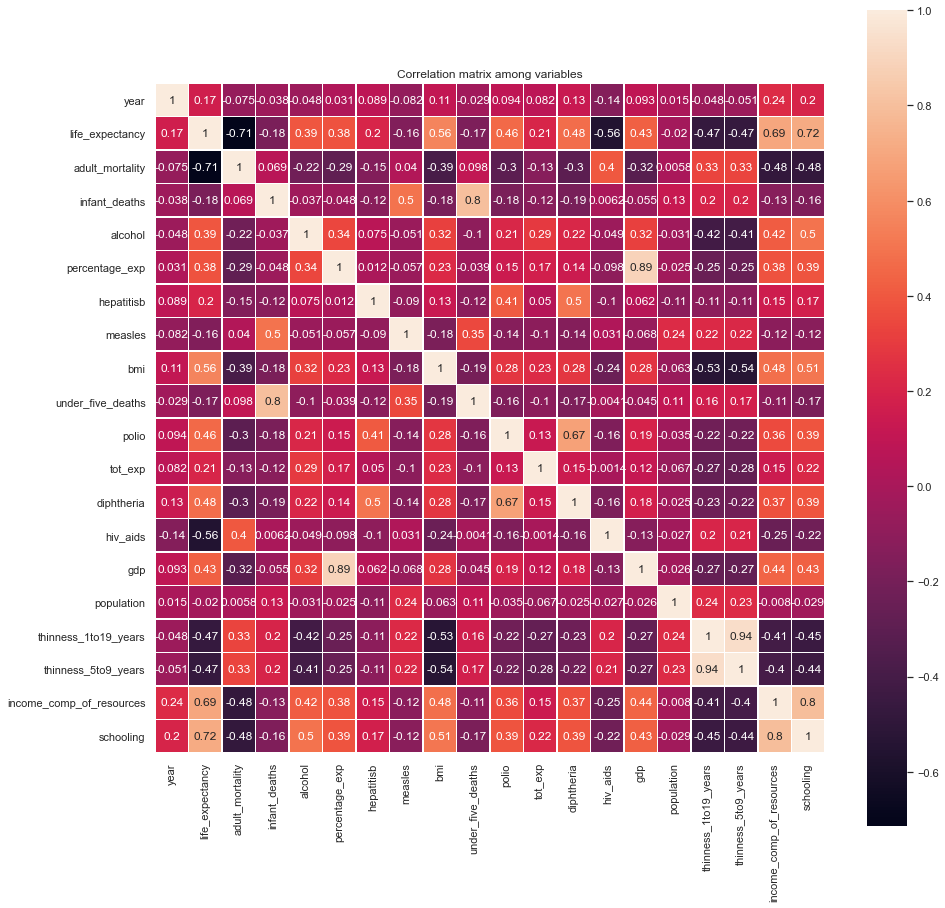

In [54]:
cormat = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among variables")
plt.show()

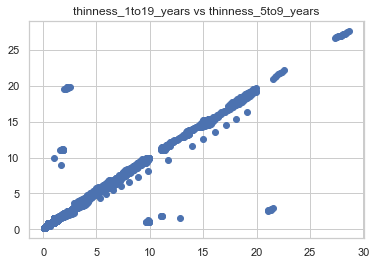

In [55]:
plt.scatter(data["thinness_5to9_years"], data["thinness_1to19_years"])
plt.title("thinness_1to19_years vs thinness_5to9_years")
plt.show()

#### Dealing with categorical variables.

- Encoded ‘status’ column but it reduced performance of the model, so I dropped that column entirely.
- Also dropping 'country' column 



In [56]:
# Dropping country and status columns - categorical variables (I've no explanation why I'm dropping them, just testing). 
# These columns are used later for Logistic regression.  

data_a = data_a.drop(columns=['country', 'status'])

In [57]:
data_a.head(10)


,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling
0,65.0,263.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1
1,59.9,271.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0
2,59.9,268.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9
3,59.5,272.0,17.6,67.0,67.0,0.1,669.959000,0.463,9.8
4,59.2,275.0,17.2,68.0,68.0,0.1,63.537231,0.454,9.5
5,58.8,279.0,16.7,66.0,66.0,0.1,553.328940,0.448,9.2
6,58.6,281.0,16.2,63.0,63.0,0.1,445.893298,0.434,8.9
7,58.1,287.0,15.7,64.0,64.0,0.1,373.361116,0.433,8.7
8,57.5,295.0,15.2,63.0,63.0,0.1,369.835796,0.415,8.4
9,57.3,295.0,14.7,58.0,58.0,0.1,272.563770,0.405,8.1


# Part I: Multi-linear regerssion

#### Data Transformation

In [58]:
# List of columns to be put under Linear Regression 

list(data_a.columns)

['life_expectancy',
 'adult_mortality',
 'bmi',
 'polio',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'income_comp_of_resources',
 'schooling']

In [59]:
# Checking dataframe skewness.

data_a.skew()

life_expectancy            -0.639693
adult_mortality             1.178712
bmi                        -0.220590
polio                      -2.104863
diphtheria                 -2.079481
hiv_aids                    5.396112
gdp                         3.482880
income_comp_of_resources   -1.177688
schooling                  -0.619859
dtype: float64

In [60]:
# CHecking if the data is skewed

# As rule of thumb, skewness can be interpreted like this: 
#	Skewness
#Fairly Symmetrical	-0.5 to 0.5
#Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
#Highly Skewed	< -1.0 and > 1.0

data_a.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
life_expectancy,-0.639693,-0.225027
adult_mortality,1.178712,1.717387
bmi,-0.220590,-1.271050
polio,-2.104863,3.820583
diphtheria,-2.079481,3.600797
hiv_aids,5.396112,34.892008
gdp,3.482880,15.087454
income_comp_of_resources,-1.177688,1.657459
schooling,-0.619859,1.114378


_______

In the following few lines are going to be trying different ways of transforming data. We will try Square Root transformation, Log transformation and BoxCox transformation, and will choose the one that gives us best result 
_____

In [61]:
# 1. Square Root transformation. It is executed properly and created a coloumn 'B_Sqrt' when executed first time. If executed second time or more, it will throw error as the the coloumn is already created. 
data_a.insert(len(data_a.columns), 'B_Sqrt',
         np.sqrt(max(data_a.iloc[:, 2]+1) - data_a.iloc[:, 2]))

In [62]:
# Observing all variables' skew and kurtosis and significant change of values for B_Sqrt values is seen. 
data_a.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
life_expectancy,-0.639693,-0.225027
adult_mortality,1.178712,1.717387
bmi,-0.220590,-1.271050
polio,-2.104863,3.820583
diphtheria,-2.079481,3.600797
hiv_aids,5.396112,34.892008
gdp,3.482880,15.087454
income_comp_of_resources,-1.177688,1.657459
schooling,-0.619859,1.114378
B_Sqrt,-0.035264,-1.093804


<AxesSubplot:>

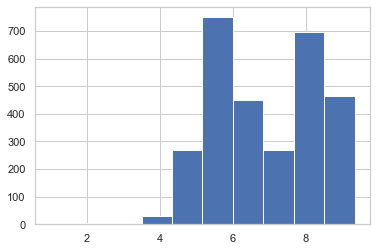

In [63]:
# Under construction: Square Root transformation
data_a['B_Sqrt'].hist()

In [64]:
# 2. Log transformation
data_a.insert(len(data_a.columns), 'C_log',
         np.log(data_a['life_expectancy']))

<AxesSubplot:>

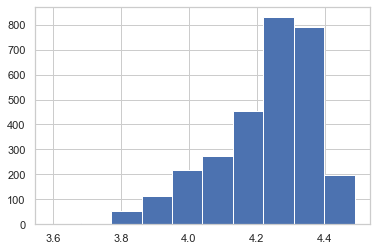

In [65]:
# testing
data_a['C_log'].hist()

In [66]:
#testing
data_a['life_expectancy'].skew()

-0.6396932035944191

In [67]:
life_expectancy_sqrt = np.sqrt(data_a['life_expectancy'])
life_expectancy_sqrt.skew()

-0.7917266592393514

In [68]:
life_expectancy_log = np.log(data_a['life_expectancy'])
life_expectancy_log.skew()

-0.9500593448354054

In [69]:
# 3. BoxCox transformation Testing:
from scipy import stats
life_expectancy_boxcox = stats.boxcox(data_a['life_expectancy'])[0]
pd.Series(life_expectancy_boxcox).skew()

-0.1056548003113346

In [70]:
# significant reduction of skewness of "life_expectancy" observed with BoxCox transformation, so we select this one

In [71]:
data_a.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
life_expectancy,-0.639693,-0.225027
adult_mortality,1.178712,1.717387
bmi,-0.220590,-1.271050
polio,-2.104863,3.820583
diphtheria,-2.079481,3.600797
hiv_aids,5.396112,34.892008
gdp,3.482880,15.087454
income_comp_of_resources,-1.177688,1.657459
schooling,-0.619859,1.114378
B_Sqrt,-0.035264,-1.093804


In [72]:
life_expectancy_boxcox

array([52210.58490322, 41352.06083214, 41352.06083214, ...,
       18052.08874596, 18632.97079899, 19466.40123101])

In [73]:
data_a['life_expectancy_boxcox'] = life_expectancy_boxcox.tolist()

In [74]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   life_expectancy           2938 non-null   float64
 1   adult_mortality           2938 non-null   float64
 2   bmi                       2938 non-null   float64
 3   polio                     2938 non-null   float64
 4   diphtheria                2938 non-null   float64
 5   hiv_aids                  2938 non-null   float64
 6   gdp                       2938 non-null   float64
 7   income_comp_of_resources  2938 non-null   float64
 8   schooling                 2938 non-null   float64
 9   B_Sqrt                    2938 non-null   float64
 10  C_log                     2938 non-null   float64
 11  life_expectancy_boxcox    2938 non-null   float64
dtypes: float64(12)
memory usage: 275.6 KB


____
Calculating z-score to obtain the number of outliers for life_expectancy and then compair with number of outliers in lifeExpectancy_boxcox 

In [75]:
# Evaluating outliers while using life_expectancy coloumn. It is also significant reduction in number of outliers 

def z_score(data_a, threshold=1):
    mean, std = np.mean(data_a), np.std(data_a)
    z_score = np.abs((data_a - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good


z_score(data_a['life_expectancy'], threshold=2).sum()


z-score of 2 corresponds to a prob of 0.27%
Rejection 138 points


2800

In [76]:
# Evaluating outliers while using life_expectancy_boxcox coloumn. It is also significant reduction in number of outliers 

def z_score(data_a, threshold=1):
    mean, std = np.mean(data_a), np.std(data_a)
    z_score = np.abs((data_a - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good


z_score(data_a['life_expectancy_boxcox'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 91 points


2847


After applying BoxCox transformation, number of outliers reduced. 

We will not proceed with removing outliers because the number is insignificant (4.69%)
_____

<AxesSubplot:>

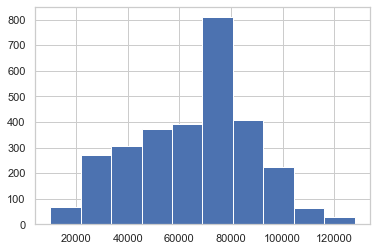

In [77]:
# skewness became normal distribution after BOX COX transformation
data_a['life_expectancy_boxcox'].hist()

<AxesSubplot:>

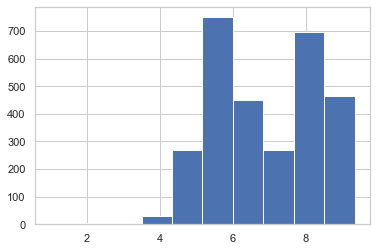

In [78]:
data_a['B_Sqrt'].hist()

In [79]:
data_a['B_Sqrt'].describe()

count    2938.000000
mean        6.921882
std         1.437710
min         1.000000
25%         5.674504
50%         6.730527
75%         8.300602
max         9.343447
Name: B_Sqrt, dtype: float64

In [80]:
data_a['life_expectancy'].describe()

count    2938.000000
mean       69.224932
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: life_expectancy, dtype: float64

### Building  Multi-linear regression model (comparing original data and box-cox transformed)

In [81]:
# Testing with all variables, where 'life_expectancy' is the target 

linear_original = sm.ols('life_expectancy ~ adult_mortality + bmi + polio + diphtheria + hiv_aids + gdp + income_comp_of_resources + schooling', data= data_a).fit()

In [82]:
# Testing with all variables, where 'life_expectancy_boxcox' is the target 

linear_boxcox = sm.ols('life_expectancy_boxcox ~ adult_mortality + bmi + polio + diphtheria + hiv_aids + gdp + income_comp_of_resources + schooling', data= data_a).fit()

In [83]:
linear_original.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1608.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:28:44   Log-Likelihood:                -8309.6
No. Observations:                2938   AIC:                         1.664e+04
Df Residuals:                    2929   BIC:                         1.669e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   54.6792      0.499    109.561      0.000      53.701      55.658
adult_mortality             -0.0283      0.001    -29.592      0.000      -0.030      -0.026
bmi                          0.0559      0.005     12.278      0.000       0.047       0.065
polio                        0.0287      0.004      6.424      0.000       0.020       0.038
diphtheria                   0.0401      0.004      9.039      0.000       0.031       0.049
hiv_aids                    -0.5349      0.016    -32.661      0.000      -0.567      -0.503
gdp                        4.78e-05   6.53e-06      7.315      0.000     3.5e-05    6.06e-05
income_comp_of_resources     6.1981      0.635      9.755      0.000       4.952       7.444
schooling                    0.7255      0.041     17.862      0.000       0.646       0.805
==============================================================================
Omnibus:                      275.333   Durbin-Watson:                   0.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.386
Skew:                          -0.315   Prob(JB):                    1.18e-292
Kurtosis:                       6.254   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
linear_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     life_expectancy_boxcox   R-squared:                       0.801
Model:                                OLS   Adj. R-squared:                  0.800
Method:                     Least Squares   F-statistic:                     1470.
Date:                    Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                            22:28:44   Log-Likelihood:                -31320.
No. Observations:                    2938   AIC:                         6.266e+04
Df Residuals:                        2929   BIC:                         6.271e+04
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.051e+04   1257.706     24.260      0.000     2.8e+04     3.3e+04
adult_mortality            -72.6897      2.412    -30.131      0.000     -77.420     -67.959
bmi                        127.1569     11.483     11.073      0.000     104.641     149.673
polio                       60.9677     11.271      5.409      0.000      38.868      83.067
diphtheria                  83.8643     11.172      7.506      0.000      61.958     105.771
hiv_aids                  -973.1841     41.270    -23.581      0.000   -1054.105    -892.263
gdp                          0.2027      0.016     12.312      0.000       0.170       0.235
income_comp_of_resources  1.504e+04   1601.115      9.394      0.000    1.19e+04    1.82e+04
schooling                 1876.5341    102.356     18.333      0.000    1675.836    2077.232
==============================================================================
Omnibus:                      182.654   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.563
Skew:                           0.347   Prob(JB):                    2.42e-103
Kurtosis:                       4.838   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_____
Observation: 

Looking at the summaty of these two models (linear_original and lidear_boxcox), we see that the linear_original (no transformations) model performed better (R-squared is 0.815 as opposed to 0.800 in the model with transformed dataset), so we will use this model as a final model.  

____
#### Interpretation of the OLS model summary:
- Dependent variable: life_expectancy
- R-squared: our model explains 81.5% of the change in our ‘life_expectancy’ variable
- Adj. R-squared: 0.814 - this is the best result we could get 
- Prob (F-Statistic):  uses this number to tell us the accuracy of the null hypothesis, or whether it is accurate that our variables’ effect is 0. In this case, it is telling us 0% chance of this. 
- AIC: ideally should be close to minus infinity, ours is 1.664e+04 which is 16640 
- Coefficient:   intercept is 54.68. 
- For each additional adult_mortality unit, the expected value of life_expectancy decreases by 0.003 on average, holding all other variables constant.
- For each additional income_comp_of_resources unit, the expected value of life_expectancy increases by  6.2 on average, holding all other variables constant.
- For each additional schooling, the expected value of life_expectancy increases by  0.73 on average, holding all other variables constant, etc.
- The t-statistic: the higher, the more significant the variable is. is related and is a measurement of the precision with which the coefficient was measured. Bmi and schooling variables have the highest t-value, followed by polio, diphtheria, gdp and  income_comp_of_resources. 
- P>|t|: The p value of 0 for all independent variables shows 0% chance that the variables have no effect on the dependent variable, life_expectancy.
- Omnibus: describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. We have 275.333.
- Skew: ours is negative: -0.315. is a measurement of symmetry in our data, with 0 being perfect symmetry. 
- Kurtosis: 6.254 which is higher than normal (between 2 and 4). Kurtosis measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers. 


In [85]:
# Testing with all variables except 'gdp' and 'income_comp_of_resources' because their coef result suggests that they are outliers

linear_2 = sm.ols('life_expectancy ~ adult_mortality + bmi + polio + diphtheria + hiv_aids + schooling', data= data_a).fit()

In [86]:
linear_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1997.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:28:44   Log-Likelihood:                -8394.8
No. Observations:                2938   AIC:                         1.680e+04
Df Residuals:                    2931   BIC:                         1.685e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          54.8758      0.508    107.986      0.000      53.879      55.872
adult_mortality    -0.0304      0.001    -31.307      0.000      -0.032      -0.029
bmi                 0.0621      0.005     13.328      0.000       0.053       0.071
polio               0.0296      0.005      6.432      0.000       0.021       0.039
diphtheria          0.0421      0.005      9.239      0.000       0.033       0.051
hiv_aids           -0.5424      0.017    -32.235      0.000      -0.575      -0.509
schooling           1.0573      0.031     34.339      0.000       0.997       1.118
==============================================================================
Omnibus:                      296.746   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1367.426
Skew:                          -0.384   Prob(JB):                    1.17e-297
Kurtosis:                       6.253   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


#### Results got worse. 

### Removing variables only makes Adj. R-squared value lower, so
The following columns give our multi-linear model the best performance: 
- adult_mortality
- bmi 
- polio
- diphtheria
- hiv_aids
- gdp
- income_comp_of_resources
- schooling
_______

# Part II: Two-sample t-test (Anna's code)


Null hypothesis states that there is no statistically significant difference in life expectancy between two populations - developed and developing countries.

Results of the two-sample t-test indicate that we should reject the null hypothesis as there is a statistically significant difference in life expectancy between the two populations - developed and developing countries

In [87]:
#generate life expectancy data

developed_le = data.life_expectancy[(data.status == 'Developed')]
developing_le = data.life_expectancy[(data.status == 'Developing')]

# conduct two sample t-test

stats.ttest_ind(a = developed_le, b = developing_le, 
                equal_var = False) # assume samples have equal variance?



Ttest_indResult(statistic=47.935024167984906, pvalue=0.0)

<AxesSubplot:xlabel='life_expectancy', ylabel='status'>

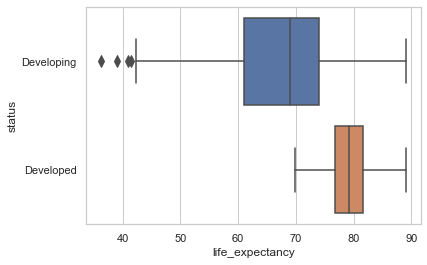

In [88]:
#plot life expectancy by country type 

sns.boxplot(y=data["status"], x=data["life_expectancy"],fliersize=8)

### Paired t-test

Null hypothesis states that there is no statistically significant difference in life expectancy in the two identified populations (developed and developing countries) over time.  Results of pair t-tests for both populations indicate that we should reject the null hypothesis as there is a statistically significant difference in life expectancy over time.

In [89]:
#generate data for life expectancy in developed countries in 2000 and 2015
developed_le2000 = data.life_expectancy[(data.status == 'Developed') & (data.year == 2000)]
developed_le2015 = data.life_expectancy[(data.status == 'Developed') & (data.year == 2015)]

#generate data for life expectancy in developing countries in 2000 and 2015
developing_le2000 = data.life_expectancy[(data.status == 'Developing') & (data.year == 2000)]
developing_le2015 = data.life_expectancy[(data.status == 'Developing') & (data.year == 2015)]



In [90]:
#conduct paired t-test for developed countries

stats.ttest_rel(a = developed_le2000, b = developed_le2015)

Ttest_relResult(statistic=-9.960218011308765, pvalue=3.5245811075635334e-11)

In [91]:
#conduct paired t-test for developing countries

stats.ttest_rel(a = developing_le2000, b = developing_le2015)



Ttest_relResult(statistic=-13.760179518465456, pvalue=2.221272845183315e-28)

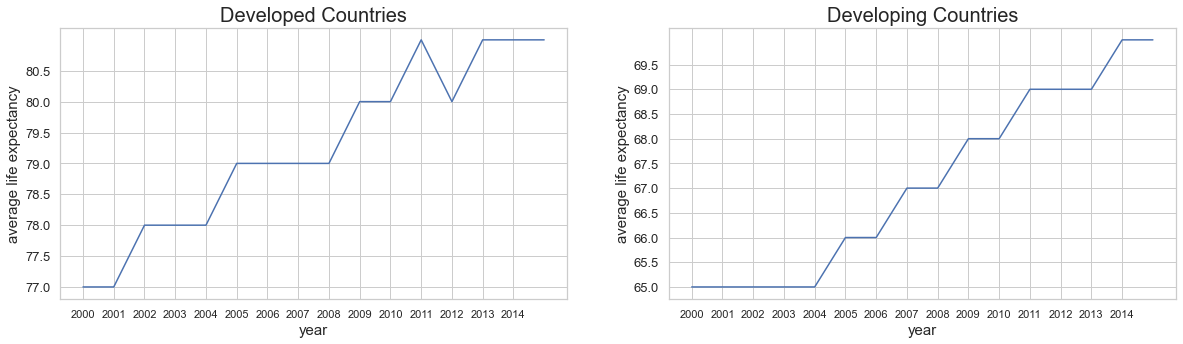

In [92]:
#plot life expectancy change over time (2000 vs. 2015)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
developed_le_change = pd.DataFrame(data.life_expectancy[data.status =='Developed'].groupby(data.year).mean().round(0))
plt.plot(developed_le_change)
plt.xticks(np.arange(2000,2015,1))
plt.xlabel('year', fontsize = 15)
plt.yticks(np.arange(77,81, 0.5), fontsize = 13)
plt.ylabel('average life expectancy', fontsize = 15)
plt.title("Developed Countries", fontsize = 20)

plt.subplot(1, 2, 2)
developing_le_change = pd.DataFrame(data.life_expectancy[data.status =='Developing'].groupby(data.year).mean().round(0))
plt.plot(developing_le_change)
plt.xticks(np.arange(2000,2015,1))
plt.xlabel('year', fontsize = 15)
plt.yticks(np.arange(65,70,0.5), fontsize = 13)
plt.ylabel('average life expectancy', fontsize=15)
plt.title("Developing Countries", fontsize= 20)

#fig.tight_layout(pad=0, w_pad = 0)
plt.show()

In [94]:
data_a.head(3)

,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling,B_Sqrt,C_log,life_expectancy_boxcox
0,65.0,263.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1,8.318654,4.174387,52210.584903
1,59.9,271.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0,8.348653,4.092677,41352.060832
2,59.9,268.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9,8.378544,4.092677,41352.060832


In [95]:
# create a new dataframe for logistic regression
numdata = data[['country','status','life_expectancy','adult_mortality','bmi', 'polio', 'diphtheria','hiv_aids','gdp','income_comp_of_resources','schooling']]

#assign numerical value to categorical variable "status"
numdata = pd.get_dummies(numdata, columns = ['status'])
numdata.head()

,country,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling,status_Developed,status_Developing
0,Afghanistan,65.0,263.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,17.6,67.0,67.0,0.1,669.959000,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,17.2,68.0,68.0,0.1,63.537231,0.454,9.5,0,1


In [96]:
# group data by country

numdata1 = numdata.groupby(['country']).agg('mean')
numdata1.head()

,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling,status_Developed,status_Developing
country,,,,,,,,,,,
Afghanistan,58.19375,280.536336,15.51875,48.3750,52.3125,0.10000,340.015425,0.415375,8.21250,0,1
Albania,75.15625,143.264524,49.06875,98.1250,98.0625,0.10000,2119.726679,0.709875,12.13750,0,1
Algeria,73.61875,140.421508,48.74375,91.7500,91.8750,0.10000,2847.853392,0.694875,12.71250,0,1
Angola,49.01875,328.562500,18.01875,46.1250,47.6875,2.36875,1975.143045,0.458375,8.04375,0,1
AntiguaandBarbuda,75.05625,149.135172,38.42500,96.9375,98.3125,0.12500,9759.305728,0.488625,8.84375,0,1


______

## Part III: Logistic Regression

In [97]:
# 'life_expectancy','schooling','adult_mortality','bmi','polio','diphtheria', 'hiv_aids', 'gdp', 'income_comp_of_resources'

In [98]:
numdata.head(3)

,country,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling,status_Developed,status_Developing
0,Afghanistan,65.0,263.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9,0,1



#### More data exploration by developed/developing status

We will build the logistic regression model based on 'status' column (Developing and Developed countries)

In [99]:
numdata['status_Developing'].value_counts()

1    2426
0     512
Name: status_Developing, dtype: int64

In [100]:
# Checking persentage of developed vs developing countries in the dataset

developing = len(numdata[numdata['status_Developed']==0])
developed = len(numdata[numdata['status_Developed']==1])
pct_developing = developing/(developing+developed)
print("Percentage of developing countries in the dataset is", pct_developing*100)
pct_developed = developed/(developing+developed)
print("Percentage of developed countries in the dataset is", pct_developed*100)

Percentage of developing countries in the dataset is 82.57317903335603
Percentage of developed countries in the dataset is 17.426820966643973


Our classes are imbalanced, and the ratio of developing to developed instances is 83:17. Before we go ahead to balance the classes, let’s do some more exploration.

In [101]:
numdata.groupby('status_Developing').mean()

,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling,status_Developed
status_Developing,,,,,,,,,,
0,79.197852,110.375633,51.803906,93.736328,93.476562,0.100000,20232.107949,0.831401,15.484285,1
1,67.120177,202.664369,35.475772,80.189387,79.970386,2.088664,4792.531044,0.584529,11.255924,0


Observations: 

- Life expectancy in Developed countries is 12 years higher on average 
- Adult mortality in Developed countries is twice lower (probability of dying between 15 and 60 years per 1000 population)
- BMI in Developed countries is higher
- Polio and Diphtheria immunization level is almost the same in both Developed and Develiping countries (slightly higher in Developed)
- HIV/AIDS (deaths per 1 000 live births HIV/AIDS) is significantly higher in Developing countries 
- GPD is significantly higher in Developed countries
- Human Development Index in terms of income composition of resources - higher in Developed countries by 30%
- Schooling is higher in Developed countries by 27%


_______
______

### Building Generalized Linear Model Regression with all variables

In [102]:
# 'status_Developed + status_Developing ~ life_expectancy + schooling + adult_mortality + income_comp_of_resources'
# 'status_Developed + status_Developing ~ life_expectancy + schooling + adult_mortality + bmi + polio + diphtheria + hiv_aids + gdp + income_comp_of_resources

In [103]:
# Generalized Linear Model Regression with all variables in dataset: numdata

result_glm = sm.formula.glm(formula ='status_Developed + status_Developing ~ life_expectancy + schooling + adult_mortality + bmi + polio + diphtheria + hiv_aids + gdp + income_comp_of_resources', family=sm.families.Binomial(), data=numdata).fit()

/Users/irinabelaya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/irinabelaya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


In [104]:
Predicted_prob=result_glm.predict(numdata)

In [105]:
result_glm.summary()

/Users/irinabelaya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/Users/irinabelaya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['status_Developed', 'status_Developing']   No. Observations:                 2938
Model:                                                   GLM   Df Residuals:                     2928
Model Family:                                       Binomial   Df Model:                            9
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                    nan
Date:                                       Mon, 01 Aug 2022   Deviance:                          nan
Time:                                               22:28:45   Pearson chi2:                 1.47e+03
No. Iterations:                                          100                                         
Covariance Type:                                   nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.1599    2.3e+04  -5.04e-05      1.000   -4.51e+04    4.51e+04
life_expectancy              0.2328      0.026      8.796      0.000       0.181       0.285
schooling                    0.2356      0.059      4.024      0.000       0.121       0.350
adult_mortality              0.0037      0.002      1.978      0.048    3.44e-05       0.007
bmi                          0.0069      0.004      1.762      0.078      -0.001       0.015
polio                        0.0075      0.006      1.166      0.244      -0.005       0.020
diphtheria                   0.0064      0.006      1.089      0.276      -0.005       0.018
hiv_aids                  -265.3250    2.3e+05     -0.001      0.999   -4.52e+05    4.51e+05
gdp                       5.082e-06   4.72e-06      1.077      0.281   -4.17e-06    1.43e-05
income_comp_of_resources     4.6367      1.458      3.180      0.001       1.778       7.495
============================================================================================
"""

Looking at P-value for each column, we notice that adult_mortality, bmi, polio, diphtheria, hiv_aids, gdp have high P-value (more than 0.05), so we'll remove them in the next step

In [106]:
# Generalized Linear Model Regression after removing variables with high P-value (higher than 0.05)

result_glm_1 = sm.formula.glm(formula = 'status_Developed + status_Developing ~ life_expectancy + schooling  + income_comp_of_resources', family=sm.families.Binomial(), data=numdata).fit()

In [107]:
Predicted_prob=result_glm_1.predict(numdata)
result_glm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['status_Developed', 'status_Developing']   No. Observations:                 2938
Model:                                                   GLM   Df Residuals:                     2934
Model Family:                                       Binomial   Df Model:                            3
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -707.48
Date:                                       Mon, 01 Aug 2022   Deviance:                       1415.0
Time:                                               22:28:45   Pearson chi2:                 1.64e+03
No. Iterations:                                            8                                         
Covariance Type:                                   nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -26.2778      1.416    -18.555      0.000     -29.053     -23.502
life_expectancy              0.2264      0.022     10.249      0.000       0.183       0.270
schooling                    0.2590      0.059      4.408      0.000       0.144       0.374
income_comp_of_resources     5.6765      1.407      4.035      0.000       2.919       8.434
============================================================================================
"""

In [108]:
result_glm_1.params

Intercept                  -26.277765
life_expectancy              0.226363
schooling                    0.259043
income_comp_of_resources     5.676539
dtype: float64

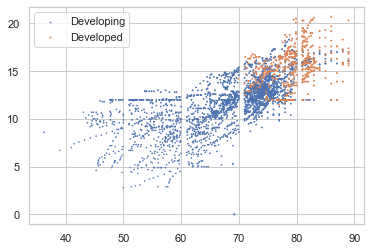

In [109]:
plt.scatter(numdata.life_expectancy[numdata.status_Developing == 1], numdata.schooling[numdata.status_Developing == 1], numdata.income_comp_of_resources[numdata.status_Developing == 1], label = 'Developing')
plt.scatter(numdata.life_expectancy[numdata.status_Developing == 0], numdata.schooling[numdata.status_Developing == 0], numdata.income_comp_of_resources[numdata.status_Developing == 0], label = 'Developed')

plt.legend()

In [131]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(numdata, test_size=0.3, random_state=42)

In [132]:
target = 'status_Developing'
features = list(train_set.columns)
features = [f for f in features if f != target]

In [133]:
# Train set
X_tr = train_set[features]
y_tr = train_set[[target]]

# Test set
X_te = test_set[features]
y_te = test_set[[target]]

In [136]:
test_set.count()

country                     882
life_expectancy             882
adult_mortality             882
bmi                         882
polio                       882
diphtheria                  882
hiv_aids                    882
gdp                         882
income_comp_of_resources    882
schooling                   882
status_Developed            882
status_Developing           882
dtype: int64

In [110]:
'''Set the life_expectancy, schooling and income_comp_of_resources as predictors and add constant to predictors for Intercept, 
and the target is status_Developing column.'''

X_cr = numdata[['life_expectancy', 'schooling', 'income_comp_of_resources']]
Y_cr = numdata['status_Developing'].values

### Instantiate  LogisticRegression model

log_reg = LogisticRegression(C=1e10)

'''Train the model'''
log_reg.fit(X_cr, Y_cr)

LogisticRegression(C=10000000000.0)

In [111]:
'''Predict the targets'''

Y_log_reg_pred = log_reg.predict(X_cr)

In [129]:
'''To estimate goodness of the fit we evalute the accuracy_score,
which counts the number of correctly predicted observations.'''

glm_accuracy = accuracy_score(Y_cr, Y_log_reg_pred)
glm_accuracy

0.8955071477195371

In [130]:
glm_f1 = f1_score(Y_cr, Y_log_reg_pred)
glm_f1 

0.938042381432896

Overfitting, likely because we did not split the data into train and test and only checked it on train which is the whole dataset in our case

In [127]:
data_a.columns

Index(['life_expectancy', 'adult_mortality', 'bmi', 'polio', 'diphtheria',
       'hiv_aids', 'gdp', 'income_comp_of_resources', 'schooling', 'B_Sqrt',
       'C_log', 'life_expectancy_boxcox'],
      dtype='object')

In [113]:
print("Accuracy of GLM model with the following independent variables:'life_expectancy', 'schooling', 'income_comp_of_resources' is ", round(glm_accuracy,2), '%')

Accuracy of GLM model with the following independent variables:'life_expectancy', 'schooling', 'income_comp_of_resources' is  0.9 %


#### Accuracy score of Logistic Regression model is 0.895 with the following independent variables: 

#### 'life_expectancy', 'schooling', 'income_comp_of_resources'

### Logit regression

In [114]:
numdata.head(3)

,country,life_expectancy,adult_mortality,bmi,polio,diphtheria,hiv_aids,gdp,income_comp_of_resources,schooling,status_Developed,status_Developing
0,Afghanistan,65.0,263.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9,0,1


In [115]:
# Independent variables:  'life_expectancy','adult_mortality','bmi', 'polio','diphtheria','hiv_aids','gdp', 'income_comp_of_resources','schooling'

X_logit = numdata[['life_expectancy','adult_mortality','bmi', 'polio','diphtheria','hiv_aids','gdp', 'income_comp_of_resources','schooling']].values
Y_logit = numdata['status_Developing'].values.astype(np.float)


'''Perform the fit with Logit method.'''

logitReg = sm.Logit(Y_logit, X_logit)
logit_fit = logitReg.fit()

Optimization terminated successfully.
         Current function value: 0.230703
         Iterations 18


In [116]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2938
Model:                          Logit   Df Residuals:                     2929
Method:                           MLE   Df Model:                            8
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                  0.5013
Time:                        22:28:45   Log-Likelihood:                -677.80
converged:                       True   LL-Null:                       -1359.1
Covariance Type:            nonrobust   LLR p-value:                7.006e-289
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2328      0.026     -8.796      0.000      -0.285      -0.181
x2            -0.0037      0.002     -1.978      0.048      -0.007   -3.44e-05
x3            -0.0069      0.004     -1.762      0.078      -0.015       0.001
x4            -0.0075      0.006     -1.166      0.244      -0.020       0.005
x5            -0.0064      0.006     -1.089      0.276      -0.018       0.005
x6           276.9237     21.295     13.004      0.000     235.187     318.660
x7         -5.082e-06   4.72e-06     -1.077      0.281   -1.43e-05    4.17e-06
x8            -4.6367      1.458     -3.180      0.001      -7.495      -1.778
x9            -0.2356      0.059     -4.024      0.000      -0.350      -0.121
==============================================================================

Possibly complete quasi-separation: A fraction 0.40 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model. Higher values meaning a better fit. Unlike linear regression's R-squared, though, you can't use it to say "we're explaining such-and-such of the variation." You can only use it to say "this model is better than that model."

- Our Pseudo R-squ. value for this model is 0.5013 


In [117]:
# Removed some columns where p-value was more than 0.05. 
# Independent variables for this model: 'life_expectancy','hiv_aids', 'income_comp_of_resources','schooling' after remo

X_logit = numdata[['life_expectancy','hiv_aids', 'income_comp_of_resources','schooling']].values
Y_logit = numdata['status_Developing'].values.astype(np.float)
logitReg = sm.Logit(Y_logit, X_logit)
logit_fit = logitReg.fit()

Optimization terminated successfully.
         Current function value: 0.233197
         Iterations 17


In [118]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2938
Model:                          Logit   Df Residuals:                     2934
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Aug 2022   Pseudo R-squ.:                  0.4959
Time:                        22:28:45   Log-Likelihood:                -685.13
converged:                       True   LL-Null:                       -1359.1
Covariance Type:            nonrobust   LLR p-value:                5.907e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2080      0.022     -9.374      0.000      -0.252      -0.165
x2           240.8090     14.519     16.586      0.000     212.352     269.266
x3            -4.9608      1.355     -3.660      0.000      -7.617      -2.304
x4            -0.2499      0.057     -4.381      0.000      -0.362      -0.138
==============================================================================

Possibly complete quasi-separation: A fraction 0.40 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- Pseudo R-squ. value for this model is 0.4959 which is slightly worse than the previous one 

In [119]:
logit_fit.params

array([-2.08035745e-01,  2.40808992e+02, -4.96081986e+00, -2.49850231e-01])

In [120]:
logit_fit.predict(X_logit)

array([0.99652561, 0.99884177, 0.99890341, ..., 1.        , 1.        ,
       1.        ])

In [121]:
(logit_fit.predict(X_logit) >= 0.5).astype(int)

array([1, 1, 1, ..., 1, 1, 1])

The obtained array contains the predicted output values. As you can see, 𝑏₀, 𝑏₁, and the probabilities obtained with scikit-learn and StatsModels are different. This is the consequence of applying different iterative and approximate procedures and parameters. However, in this case, you obtain the same predicted outputs as when you used scikit-learn

In [122]:
# The confusion matrix

logit_fit.pred_table()

array([[ 310.,  202.],
       [ 105., 2321.]])

______
#### This can help with interpretation


Positive (P): Observation is positive (eg. is a dog).

Negative (N): Observation is not positive (eg. is not a dog).

True Positive (TP): Outcome where the model correctly predicts the positive class.

True Negative (TN): Outcome where the model correctly predicts the negative class.

False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
Accuracy
False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.
_________

True Positive (TP): 310

True Negative (TN): 2321

False Positive (FP): 202

False Negative (FN): 105

______


Accuracy = (TP+TN)/Total 

Accuracy Percentage = 100 * Accuracy

______

In [123]:
# Accuracy of Logit model:

logit_accuracy = (310+2321)/(310+2321+202+105)*100
logit_accuracy

89.55071477195371

In [124]:
print("Accuracy of Logit model is", round(logit_accuracy,2), '%')

Accuracy of Logit model is 89.55 %
